<a href="https://colab.research.google.com/github/profcintiapinho/laboratorio_ia/blob/main/Classifica%C3%A7%C3%A3o_de_sentimentos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importando uma base de dados aleatória de sentimentos, vocês podem até fazer o download dela e acrescentar mais frases depois

In [ ]:
#importanto a base de dados do Github da Prof cíntia Pinho
import pandas as pd

url = 'https://github.com/profcintiapinho/laboratorio_ia/raw/refs/heads/main/sentimentos.xlsx'
base = pd.read_excel(url)

base

,frase,sentimento
0,não precisei pagar o ingresso,alegria
1,se eu ajeitar tudo fica bem,alegria
2,Fechei aquela venda difícil e estou me sentind...,alegria
3,Quando o cliente elogia seu atendimento e aind...,alegria
4,Nada se compara à sensação de bater a meta ant...,alegria
...,...,...
905,Não é possível que ninguém veja o absurdo do q...,raiva
906,"Se eu não me controlar, perco a cabeça com tan...",raiva
907,Cansei de me calar diante de tanta injustiça d...,raiva
908,Fizeram promessas só pra me usar — e agora fin...,raiva


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
type(base)

pandas.core.frame.DataFrame

## Embaralhando a base

In [ ]:
#Embraralhando a base
import sklearn
base = sklearn.utils.shuffle(base)

In [ ]:
base

,frase,sentimento
221,temo pela sua segurança,medo
626,Não suporto a ideia de viver uma vida infeliz.,medo
195,ouço passos na minha direção,medo
685,Sinto uma irritação que não cabe no peito.,raiva
721,Minhas tentativas parecem sempre fracassar.,tristeza
...,...,...
476,"Enquanto isso, quem deveria proteger, abusa!",raiva
765,"Fico sorrindo, mas por dentro só há dor.",tristeza
443,Eles acham que somos idiotas.,raiva
545,É tanta alegria que não cabe no peito!,alegria


In [ ]:
#para acessar um item quando é um dataframe
base.iloc[[10]]

,frase,sentimento
617,A família toda reunida em volta da mesa é minh...,alegria


In [ ]:
#quantidade de linhas de um dataframe
base.shape

(910, 2)

In [ ]:
#quantidade de linhas de uma lista
len(base)

910

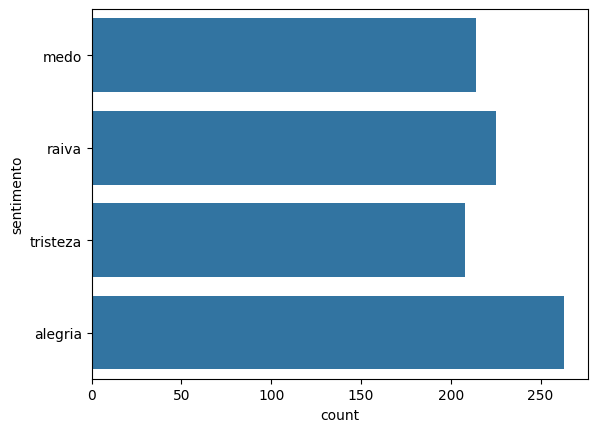

In [ ]:
import seaborn as sns
sns.countplot(base['sentimento'], label = 'Contagem');

#vamos ver como fazer uma nuvem de palavras

In [ ]:
# Importa a biblioteca spaCy para processamento de linguagem natural
import spacy

# Importa a biblioteca WordCloud para criar nuvens de palavras
from wordcloud import WordCloud

# Importa o matplotlib para mostrar gráficos e imagens na tela
import matplotlib.pyplot as plt

In [ ]:
# Comando para baixar e instalar o modelo de linguagem em português do spaCy
!python -m spacy download pt_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 32.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
# Carrega o modelo do spaCy para português
nlp = spacy.load("pt_core_news_sm")

In [ ]:
# Pega os sentimentos diferentes que existem na base
sentimentos = base['sentimento'].unique()
print(sentimentos)

['medo' 'raiva' 'tristeza' 'alegria']


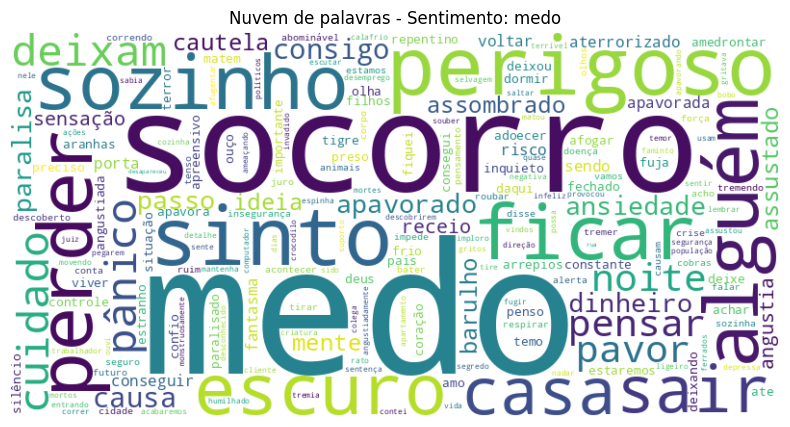

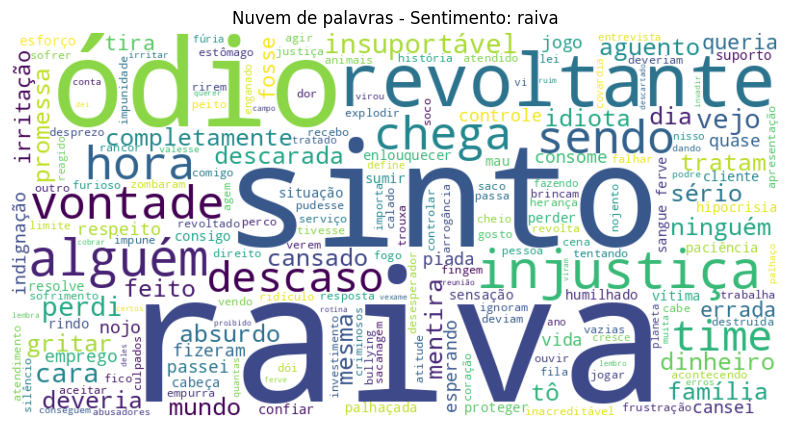

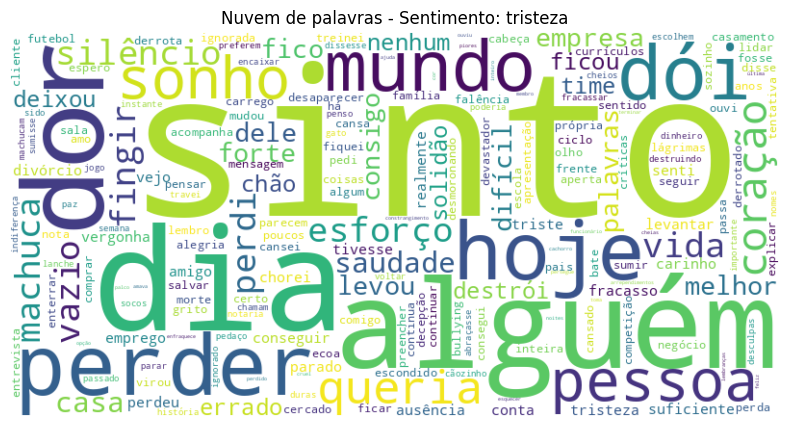

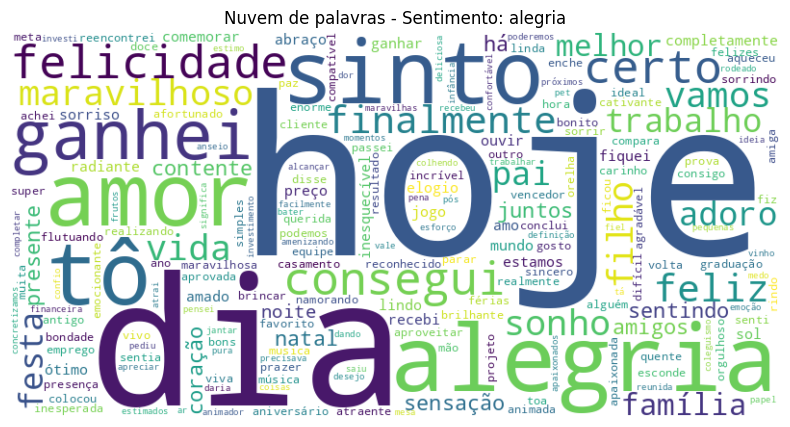

In [ ]:
# Vamos criar uma nuvem para cada sentimento
for sentimento in sentimentos:
    # Filtra as frases daquele sentimento
    frases = base[base['sentimento'] == sentimento]['frase']

    # Junta tudo em uma única string, para facilitar a nuvem
    texto = " ".join(frases)

    # Passa o texto pelo spaCy
    doc = nlp(texto)

    # Vamos criar uma lista só com palavras que não são stopwords, nem pontuação, nem espaços
    palavras_sem_stopwords = []
    for token in doc:
        if not token.is_stop and not token.is_punct and not token.is_space:
            palavras_sem_stopwords.append(token.text.lower())

    # Junta as palavras limpas para gerar a nuvem
    texto_limpo = " ".join(palavras_sem_stopwords)

    # Cria a nuvem de palavras
    nuvem = WordCloud(width=800, height=400, background_color='white').generate(texto_limpo)

    # Mostra a nuvem
    plt.figure(figsize=(10,5))
    plt.imshow(nuvem, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Nuvem de palavras - Sentimento: {sentimento}')
    plt.show()

### Com base na nuvem de palavras você pode tentar tirar aquelas palavras que são muito comuns em todos os sentimentos como: ninguém, veja como acrescentar uma stopword.

In [ ]:
# Lista de palavras que você quer ignorar
minhas_stopwords = ["ninguém", "deu", "fico", "mim", "pra", "queria", "gente", "deixa","vou"]

# Adiciona essas palavras à lista de stopwords do spaCy
for palavra in minhas_stopwords:
    nlp.vocab[palavra].is_stop = True


#agora se você rodar o código anterior de novo, vai ver que ele tirou essas palavras das nuvens, pode adicionar outra se achar necessário.

## Vamos contar quantas frases tem cada sentimento, usando outro tipo de gráfico

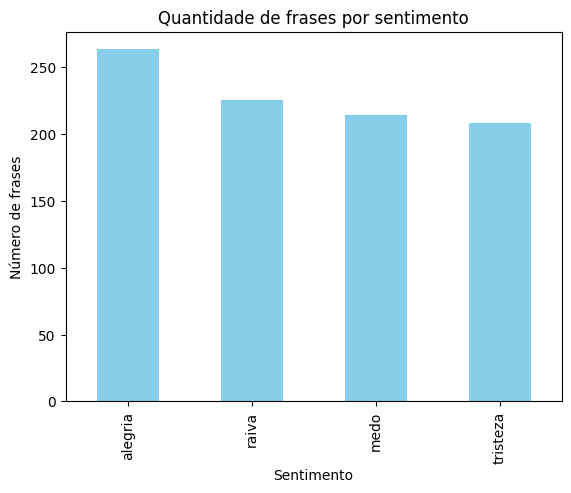

In [ ]:
base['sentimento'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Quantidade de frases por sentimento")
plt.xlabel("Sentimento")
plt.ylabel("Número de frases")
plt.show()

### Contar palavras mais comuns por sentimento

In [ ]:
from collections import Counter

for sentimento in sentimentos:
    frases = base[base['sentimento'] == sentimento]['frase']
    texto = " ".join(frases)
    doc = nlp(texto)

    palavras = [token.text.lower() for token in doc if not token.is_stop and not token.is_punct]
    contagem = Counter(palavras).most_common(10)

    print(f"\nPalavras mais comuns em: {sentimento}")
    for palavra, freq in contagem:
        print(f"{palavra}: {freq}")


Palavras mais comuns em: medo
medo: 13
socorro: 7
sinto: 7
ficar: 6
sozinho: 6
perder: 6
perigoso: 6
alguém: 6
escuro: 6
sair: 5

Palavras mais comuns em: raiva
raiva: 25
sinto: 15
ódio: 10
revoltante: 9
injustiça: 8
alguém: 7
vontade: 6
chega: 6
sendo: 6
time: 5

Palavras mais comuns em: tristeza
sinto: 31
alguém: 11
dor: 9
perder: 8
hoje: 8
dói: 7
mundo: 7
dia: 7
queria: 6
coração: 5

Palavras mais comuns em: alegria
hoje: 21
 : 12
dia: 11
alegria: 9
amor: 8
tô: 8
ganhei: 8
felicidade: 7
certo: 7
consegui: 7


Essa é mais uma chance para você retirar palavras que acredita que fazem sentido para qualquer sentimento. Mas por enquanto estamos fazendo só uma análise para entender sua base de dados, aqui voltamos a pegar a base todas, sem aplicar as stopwords.

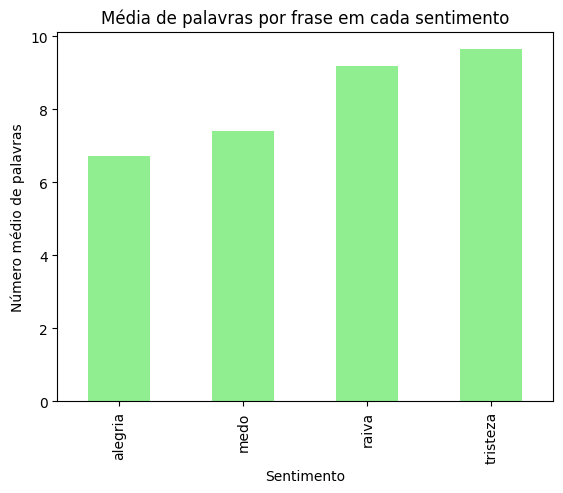

In [ ]:
# Contar o número médio de palavras por frase
base['n_palavras'] = base['frase'].apply(lambda x: len(x.split()))
media_palavras = base.groupby('sentimento')['n_palavras'].mean()

media_palavras.plot(kind='bar', color='lightgreen')
plt.title("Média de palavras por frase em cada sentimento")
plt.ylabel("Número médio de palavras")
plt.xlabel("Sentimento")
plt.show()

## Vamos pegar frases aleatórias que podem trazer confusão a base de dados

In [ ]:
# Aleatoriamente, mostra uma frase de cada sentimento
for sentimento in sentimentos:
    frase = base[base['sentimento'] == sentimento].sample(1)['frase'].values[0]
    print(f"{sentimento.upper()}: {frase}")

MEDO: aterrorizado e suando frio
RAIVA: Me parte o coração ver bichos sofrendo por causa de humanos cruéis.
TRISTEZA: Sinto que estou me perdendo um pouco mais a cada dia.
ALEGRIA: ele e realmente fiel a mim


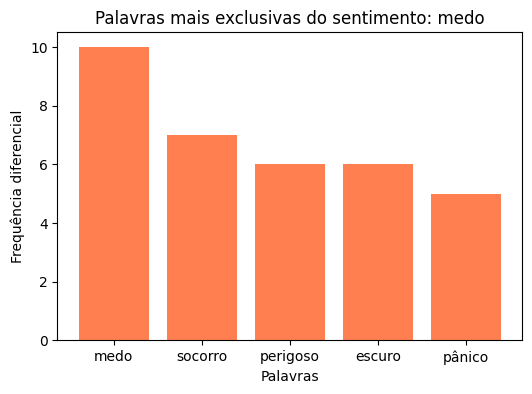

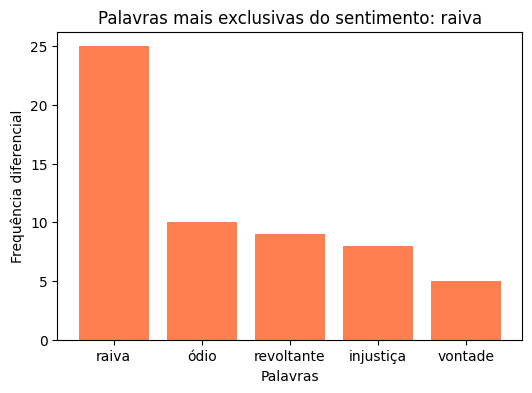

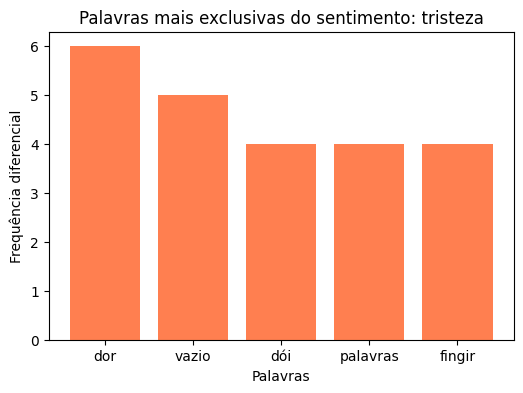

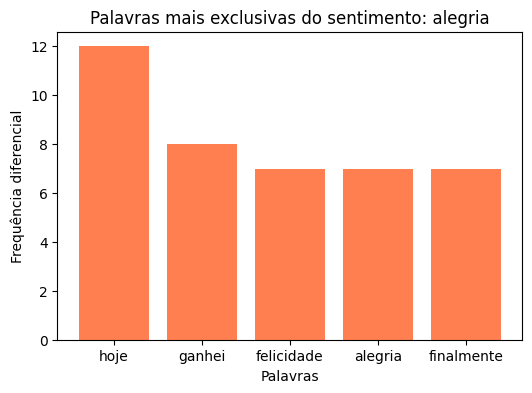

In [ ]:
# Lista dos sentimentos
sentimentos = ['medo', 'raiva', 'tristeza', 'alegria']

# Um dicionário para guardar as palavras mais comuns de cada sentimento
palavras_por_sentimento = {}

# Processa cada sentimento
for sentimento in sentimentos:
    frases = base[base['sentimento'] == sentimento]['frase']
    texto = " ".join(frases)
    doc = nlp(texto)

    # Conta as palavras, ignorando stopwords, pontuação e espaços
    palavras = [token.text.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space]
    contagem = Counter(palavras)

    palavras_por_sentimento[sentimento] = contagem

# Agora vamos encontrar as palavras mais "exclusivas" de cada sentimento
for sentimento in sentimentos:
    outras = [s for s in sentimentos if s != sentimento]

    # Palavras do sentimento atual
    palavras_sent = palavras_por_sentimento[sentimento]

    # Palavras dos outros sentimentos somadas
    palavras_outros = Counter()
    for outro in outras:
        palavras_outros += palavras_por_sentimento[outro]

    # Calcula as palavras que aparecem mais no sentimento atual do que nos outros
    diferencas = {}
    for palavra in palavras_sent:
        freq_atual = palavras_sent[palavra]
        freq_outros = palavras_outros.get(palavra, 0)
        diferenca = freq_atual - freq_outros
        if diferenca > 0:
            diferencas[palavra] = diferenca

    # Pega as 5 palavras mais exclusivas
    top_exclusivas = sorted(diferencas.items(), key=lambda x: x[1], reverse=True)[:5]

    # Plota o gráfico
    palavras = [item[0] for item in top_exclusivas]
    valores = [item[1] for item in top_exclusivas]

    plt.figure(figsize=(6, 4))
    plt.bar(palavras, valores, color='coral')
    plt.title(f'Palavras mais exclusivas do sentimento: {sentimento}')
    plt.ylabel('Frequência diferencial')
    plt.xlabel('Palavras')
    plt.show()

### Lembrando que os códigos anteriores não foram usados funções porque vocês ainda não tiveram, só até laços de repetição, então não usamos funções aqui.

# Agora que você entendeu melhor a base pode rodar um algoritmo de Machine Learn para prever sentimentos com base em frases novas.

##Vamos Separar texto do rótulo - O sentimento é o que queremos prever, então fica separado.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
frases = base[['frase']]
sentimento = base['sentimento'].values

In [ ]:
frases.head()

,frase
221,temo pela sua segurança
626,Não suporto a ideia de viver uma vida infeliz.
195,ouço passos na minha direção
685,Sinto uma irritação que não cabe no peito.
721,Minhas tentativas parecem sempre fracassar.


In [ ]:
sentimento

array(['medo', 'medo', 'medo', 'raiva', 'tristeza', 'medo', 'medo',
       'tristeza', 'raiva', 'raiva', 'alegria', 'alegria', 'tristeza',
       'medo', 'tristeza', 'tristeza', 'raiva', 'alegria', 'tristeza',
       'medo', 'alegria', 'alegria', 'raiva', 'raiva', 'alegria',
       'alegria', 'medo', 'tristeza', 'medo', 'alegria', 'alegria',
       'medo', 'alegria', 'medo', 'raiva', 'raiva', 'alegria', 'raiva',
       'alegria', 'medo', 'alegria', 'raiva', 'alegria', 'alegria',
       'alegria', 'medo', 'tristeza', 'alegria', 'raiva', 'tristeza',
       'medo', 'alegria', 'alegria', 'tristeza', 'raiva', 'alegria',
       'raiva', 'raiva', 'alegria', 'alegria', 'medo', 'tristeza',
       'raiva', 'raiva', 'medo', 'medo', 'alegria', 'tristeza', 'raiva',
       'alegria', 'alegria', 'raiva', 'tristeza', 'medo', 'tristeza',
       'raiva', 'raiva', 'raiva', 'alegria', 'raiva', 'tristeza',
       'tristeza', 'alegria', 'alegria', 'alegria', 'medo', 'raiva',
       'alegria', 'alegria', 'me

## Remoção das Stop Words apenas das frases, realmente ver se a pena fazer com ou sem.

In [ ]:
# Função para remover stopwords e pontuações
def limpar_texto(texto):
    doc = nlp(texto)
    palavras = [token.text.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space]
    return " ".join(palavras)

# Aplica a função de limpeza nas frases
base['frase_limpa'] = base['frase'].apply(limpar_texto)

In [ ]:
base

,frase,sentimento,n_palavras,frase_limpa
221,temo pela sua segurança,medo,4,temo segurança
626,Não suporto a ideia de viver uma vida infeliz.,medo,9,suporto ideia viver vida infeliz
195,ouço passos na minha direção,medo,5,ouço passos direção
685,Sinto uma irritação que não cabe no peito.,raiva,8,sinto irritação cabe peito
721,Minhas tentativas parecem sempre fracassar.,tristeza,5,tentativas parecem fracassar
...,...,...,...,...
476,"Enquanto isso, quem deveria proteger, abusa!",raiva,6,deveria proteger abusa
765,"Fico sorrindo, mas por dentro só há dor.",tristeza,8,fico sorrindo há dor
443,Eles acham que somos idiotas.,raiva,5,acham idiotas
545,É tanta alegria que não cabe no peito!,alegria,8,alegria cabe peito


## Entendendo para o que é uma vetorização

## 🧠 Transformando palavras em números com Bag of Words

Antes de aplicar algoritmos, precisamos transformar as **frases em números**, pois o computador **não entende palavras** como nós.

---

### 📦 O que é "Bag of Words"?

Imagine um **saco cheio de palavras** (o vocabulário da base). Cada frase será convertida em uma **tabela** com quantas vezes cada palavra aparece.

#### 🔤 Exemplo:

Temos 3 frases:

- "gosto de sorvete"  
- "não gosto de chuva"  
- "sorvete é bom"  

Nosso vocabulário será:  
**[gosto, de, sorvete, não, chuva, é, bom]**

Cada frase será transformada em uma contagem:

| Frase                | gosto | de | sorvete | não | chuva | é | bom |
|---------------------|:-----:|:--:|:-------:|:---:|:-----:|:-:|:---:|
| gosto de sorvete    |   1   | 1  |    1    |  0  |   0   | 0 |  0  |
| não gosto de chuva  |   1   | 1  |    0    |  1  |   1   | 0 |  0  |
| sorvete é bom       |   0   | 0  |    1    |  0  |   0   | 1 |  1  |

Sendo assim, esse processo que está sendo relizado abaixo é para converter todas as frases em números

In [ ]:
# Vetoriza as frases limpas (Bag of Words)
vetorizador = CountVectorizer()
 = vetorizador.fit_transform(base['frase_limpa'])

# Rótulos (sentimentos)
y = base['sentimento']

In [ ]:
# se você tentar imprimir vai ver que ele se torna uma matriz de números e não é possível a visualização
X

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 3206 stored elements and shape (910, 1668)>

# Esse código é só para Ilustrar o que acontece com a base de dados após vetorizar, assim você tem uma ideia do que acontece.

In [ ]:
# Converte X (matriz esparsa) em um DataFrame
X_df = pd.DataFrame(X.toarray(), columns=vetorizador.get_feature_names_out())

# Junta com a frase original (só as primeiras para não ficar gigante)
visualizacao = pd.concat([base[['frase']].reset_index(drop=True), X_df], axis=1)

# Mostra as 5 primeiras
visualizacao.head()

# Essa imagem mostra como exatamente  o CountVectorizer transforma as frases: cada linha representa uma frase, e cada coluna é uma palavra do vocabulário. O número "1" significa que aquela palavra aparece na frase correspondente, e "0" significa que não aparece.

,frase,abominável,abraçasse,abraço,abrisse,absurdo,absurdos,abundancia,abundante,abusa,...,água,ânimo,ânimos,ética,ímpeto,ódio,órgão,ótimo,última,única
0,temo pela sua segurança,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Não suporto a ideia de viver uma vida infeliz.,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ouço passos na minha direção,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Sinto uma irritação que não cabe no peito.,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Minhas tentativas parecem sempre fracassar.,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 3. Dividir os dados em treino e teste

In [ ]:
# Divide os dados em conjuntos de treino e teste.
# X_treino e y_treino serão usados para treinar o modelo,
# enquanto X_teste e y_teste serão usados para avaliar a performance do modelo.
# 'test_size=0.2' indica que 20% dos dados serão reservados para teste.
# 'random_state=42' garante que a divisão seja reproduzível, ou seja,
# sempre que rodar o código com essa semente, o resultado será o mesmo.
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

 4. Treinar 3 modelos de classificação

In [ ]:
# Importa o classificador Naive Bayes Multinomial, ideal para dados de texto (ex: análise de sentimentos)
from sklearn.naive_bayes import MultinomialNB

# Importa o modelo de Regressão Logística, um classificador linear simples e eficiente
from sklearn.linear_model import LogisticRegression

# Importa o Random Forest, um modelo de ensemble baseado em várias árvores de decisão (muito robusto)
from sklearn.ensemble import RandomForestClassifier

# Importa o Gradient Boosting, outro modelo de ensemble que constrói árvores de forma sequencial (muito preciso)
from sklearn.ensemble import GradientBoostingClassifier

# Importa o classificador SGD (Stochastic Gradient Descent), útil para grandes volumes de dados e com vários algoritmos possíveis (ex: SVM, regressão logística)
from sklearn.linear_model import SGDClassifier

# Importa a função para exibir métricas de desempenho (precisão, recall, F1-score etc.)
from sklearn.metrics import classification_report

# Naive Bayes
modelo_nb = MultinomialNB()
modelo_nb.fit(X_treino, y_treino)
y_pred_nb = modelo_nb.predict(X_teste)

# Regressão Logística
modelo_lr = LogisticRegression(max_iter=1000)
modelo_lr.fit(X_treino, y_treino)
y_pred_lr = modelo_lr.predict(X_teste)

# Random Forest
modelo_rf = RandomForestClassifier()
modelo_rf.fit(X_treino, y_treino)
y_pred_rf = modelo_rf.predict(X_teste)

# GradientBoostingClassifier
modelo_gdb = RandomForestClassifier()
modelo_gdb.fit(X_treino, y_treino)
y_pred_gdb = modelo_gdb.predict(X_teste)

# SGDClassifier
modelo_sgd = RandomForestClassifier()
modelo_sgd.fit(X_treino, y_treino)
y_pred_sgd = modelo_sgd.predict(X_teste)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Lista com os rótulos originais, na ordem correta
rotulos = ['medo', 'raiva', 'tristeza', 'alegria']

def plotar_matriz_confusao(y_true, y_pred, modelo_nome):
    cm = confusion_matrix(y_true, y_pred, labels=rotulos)  # garante a ordem
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=rotulos, yticklabels=rotulos)
    plt.title(f'Matriz de Confusão - {modelo_nome}')
    plt.xlabel('Predito')
    plt.ylabel('Real')
    plt.show()


=== Naive Bayes ===
              precision    recall  f1-score   support

     alegria       0.74      0.80      0.77        46
        medo       0.86      0.72      0.78        43
       raiva       0.76      0.73      0.75        52
    tristeza       0.61      0.68      0.64        41

    accuracy                           0.74       182
   macro avg       0.74      0.73      0.74       182
weighted avg       0.74      0.74      0.74       182



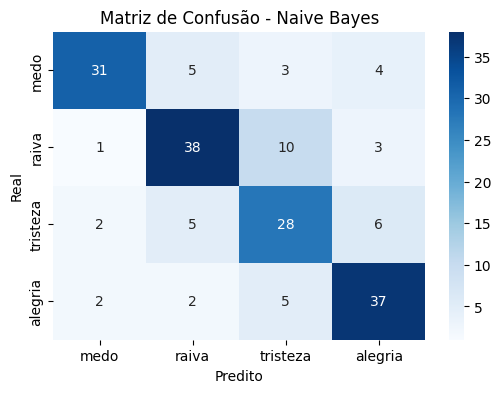

=== Regressão Logística ===
              precision    recall  f1-score   support

     alegria       0.63      0.87      0.73        46
        medo       0.84      0.72      0.78        43
       raiva       0.81      0.65      0.72        52
    tristeza       0.72      0.71      0.72        41

    accuracy                           0.74       182
   macro avg       0.75      0.74      0.74       182
weighted avg       0.75      0.74      0.74       182



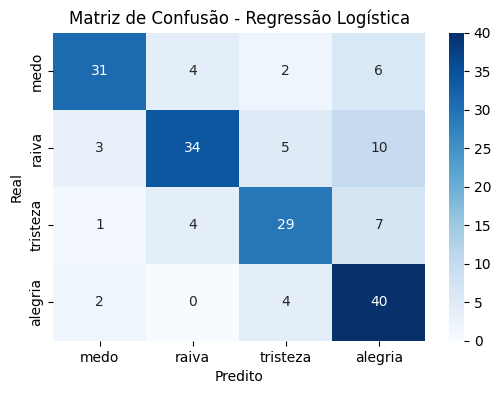

=== Random Forest ===
              precision    recall  f1-score   support

     alegria       0.70      0.50      0.58        46
        medo       0.81      0.49      0.61        43
       raiva       0.87      0.38      0.53        52
    tristeza       0.30      0.73      0.43        41

    accuracy                           0.52       182
   macro avg       0.67      0.53      0.54       182
weighted avg       0.68      0.52      0.54       182



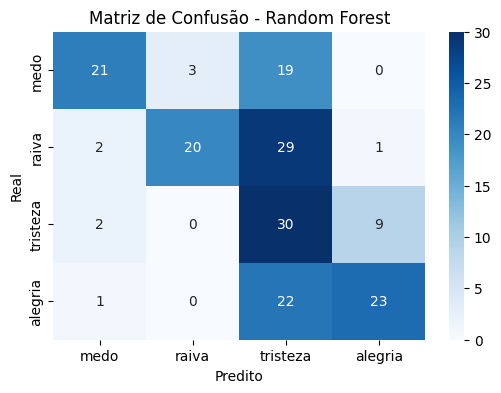

=== GradientBoostingClassifier ===
              precision    recall  f1-score   support

     alegria       0.66      0.46      0.54        46
        medo       0.77      0.47      0.58        43
       raiva       0.91      0.38      0.54        52
    tristeza       0.30      0.76      0.43        41

    accuracy                           0.51       182
   macro avg       0.66      0.52      0.52       182
weighted avg       0.68      0.51      0.53       182



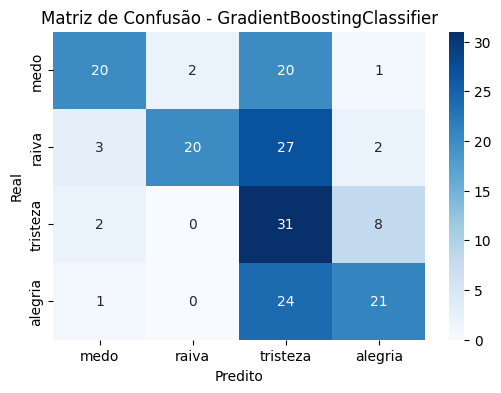

=== SGDClassifier ===
              precision    recall  f1-score   support

     alegria       0.70      0.50      0.58        46
        medo       0.84      0.49      0.62        43
       raiva       0.91      0.38      0.54        52
    tristeza       0.31      0.78      0.45        41

    accuracy                           0.53       182
   macro avg       0.69      0.54      0.55       182
weighted avg       0.71      0.53      0.55       182



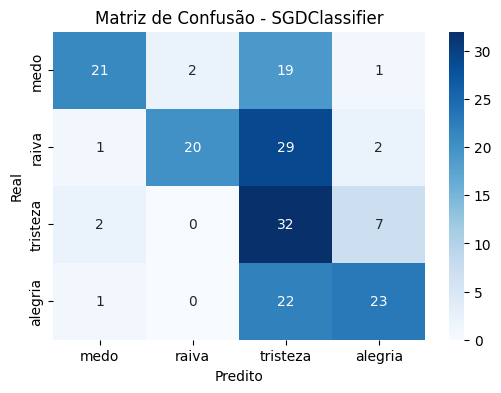

In [ ]:
# Imprime relatório e matriz de confusão para cada modelo
print("=== Naive Bayes ===")
print(classification_report(y_teste, y_pred_nb))
plotar_matriz_confusao(y_teste, y_pred_nb, "Naive Bayes")

print("=== Regressão Logística ===")
print(classification_report(y_teste, y_pred_lr))
plotar_matriz_confusao(y_teste, y_pred_lr, "Regressão Logística")

print("=== Random Forest ===")
print(classification_report(y_teste, y_pred_rf))
plotar_matriz_confusao(y_teste, y_pred_rf, "Random Forest")

print("=== GradientBoostingClassifier ===")
print(classification_report(y_teste, y_pred_gdb))
plotar_matriz_confusao(y_teste, y_pred_gdb, "GradientBoostingClassifier")

print("=== SGDClassifier ===")
print(classification_report(y_teste, y_pred_sgd))
plotar_matriz_confusao(y_teste, y_pred_sgd, "SGDClassifier")






# Agora o que você deve fazer para melhorar esses resultados? será que aumentar a base de cada frase seria uma solução?

# Mas antes disso vamos testar cada modelo com frases aleatórias

In [ ]:
# Função para testar frases novas
def testar_frase(frase):
    frase_limpa = limpar_texto(frase)
    frase_vet = vetorizador.transform([frase_limpa])

    pred_nb = modelo_nb.predict(frase_vet)[0]
    pred_lr = modelo_lr.predict(frase_vet)[0]
    pred_rf = modelo_rf.predict(frase_vet)[0]
    pred_gdb = modelo_gdb.predict(frase_vet)[0]
    pred_sgd = modelo_sgd.predict(frase_vet)[0]



    print(f'Frase: "{frase}"')
    print(f'Previsão Naive Bayes: {pred_nb}')
    print(f'Previsão Regressão Logística: {pred_lr}')
    print(f'Previsão Random Forest: {pred_rf}')
    print(f'Previsão GradientBoosting Classifier: {pred_gdb}')
    print(f'Previsão SGDC Classifier: {pred_sgd}')



In [ ]:
nova_frase = "Esse produto é excelente e eu adorei!"
testar_frase(nova_frase)

Frase: "Esse produto é excelente e eu adorei!"
Previsão Naive Bayes: alegria
Previsão Regressão Logística: alegria
Previsão Random Forest: alegria
Previsão GradientBoosting Classifier: alegria
Previsão SGDC Classifier: alegria


In [ ]:
nova_frase = "Eu adoro python"
testar_frase(nova_frase)

Frase: "Eu adoro python"
Previsão Naive Bayes: alegria
Previsão Regressão Logística: alegria
Previsão Random Forest: alegria
Previsão GradientBoosting Classifier: alegria
Previsão SGDC Classifier: alegria


In [ ]:
nova_frase = "Eu amo o projeto dos Pequenos Talentos"
testar_frase(nova_frase)

Frase: "Eu amo o projeto dos Pequenos Talentos"
Previsão Naive Bayes: alegria
Previsão Regressão Logística: alegria
Previsão Random Forest: alegria
Previsão GradientBoosting Classifier: alegria
Previsão SGDC Classifier: alegria


In [ ]:
nova_frase = "O fulano faz tudo errado, não consigo ensinar pra ele."
testar_frase(nova_frase)

Frase: "O fulano faz tudo errado, não consigo ensinar pra ele."
Previsão Naive Bayes: tristeza
Previsão Regressão Logística: tristeza
Previsão Random Forest: tristeza
Previsão GradientBoosting Classifier: tristeza
Previsão SGDC Classifier: tristeza


In [ ]:
nova_frase = "Fico irritada quando vou olhar o boletim e está cherio de nota abaixo de 7"
testar_frase(nova_frase)

Frase: "Fico irritada quando vou olhar o boletim e está cherio de nota abaixo de 7"
Previsão Naive Bayes: tristeza
Previsão Regressão Logística: tristeza
Previsão Random Forest: tristeza
Previsão GradientBoosting Classifier: tristeza
Previsão SGDC Classifier: tristeza


In [ ]:
nova_frase = "eu odeio quando ele maltrata a criança"
testar_frase(nova_frase)

Frase: "eu odeio quando ele maltrata a criança"
Previsão Naive Bayes: medo
Previsão Regressão Logística: alegria
Previsão Random Forest: tristeza
Previsão GradientBoosting Classifier: tristeza
Previsão SGDC Classifier: tristeza
